In [1]:
import pandas as pd
import numpy as np

import random
import sklearn # Dimensionality reduce
from sklearn import decomposition # Dimensionality reduce with SVD, PCA

import matplotlib.pyplot as plt
import seaborn as sns

**Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning**
- It is best practice to normalize the data before conducting a PCA as unscaled data with different measurement units can distort the relative comparison of variance across features.
- https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

In [2]:
data= pd.read_excel('Student_12f_C.xls')

In [3]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,Class
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942,3
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584,4
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296,0
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103,2
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416,0


In [4]:
data.shape

(1000, 13)

In [5]:
data.iloc[:,:-1].head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416


**Choosing k**

In [6]:
pca= sklearn.decomposition.PCA()

In [7]:
pca.fit(data.iloc[:,:-1]) #fit transform

PCA()

In [8]:
pca. n_features_ 

12

In [9]:
pca.n_samples_

1000

**Explain step 1**: mean of each columns

In [10]:
pca.mean_

array([ 3.22016832,  0.87493043,  1.01236779,  0.12770196,  1.1219226 ,
       -1.04076385,  1.12877535, -1.92019402,  0.57118398, -1.05635374,
        3.17782252,  0.90870474])

In [11]:
data.iloc[:,:-1].mean()

f1     3.220168
f2     0.874930
f3     1.012368
f4     0.127702
f5     1.121923
f6    -1.040764
f7     1.128775
f8    -1.920194
f9     0.571184
f10   -1.056354
f11    3.177823
f12    0.908705
dtype: float64

**Explain step 2**: Center columns by subtracting column means

In [12]:
C= data.iloc[:,:-1]- data.iloc[:,:-1].mean()
C.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,-5.623757,-1.093270,-4.027873,2.059883,-2.537024,1.040715,1.792182,-2.245123,-2.808747,2.624164,0.878455,-6.725647
1,-4.143134,5.689790,7.530232,-3.804593,0.404987,-5.091478,-2.413477,-5.920853,9.590782,-0.876923,5.781425,-3.401289
2,6.161157,-1.031973,8.661769,3.931688,8.028322,-7.279482,8.948203,-9.676155,-3.471241,-0.833802,-2.787793,-6.292001
3,-10.830834,-11.249982,-0.614340,-6.306557,4.726635,3.317304,-2.854939,11.298420,0.575541,-8.574339,-11.798069,-1.460807
4,5.366071,-5.140494,3.776611,4.182251,1.816130,-3.253357,5.851313,-7.958074,-5.588388,1.210846,4.470095,-1.913121


**Explain step 3**: Covariance matrix

In [13]:
V= np.cov(C.T)
V

array([[ 3.64104761e+01,  1.82042168e+01, -4.11638966e+00,
         1.80306051e+01, -4.41758446e+00,  3.50477467e+00,
         1.41793739e+00, -2.12508383e+01, -5.94683508e+00,
         1.38548123e+01,  2.09337965e+01,  7.44445813e+00],
       [ 1.82042168e+01,  3.38459263e+01, -1.04151863e+01,
         1.36844768e+01, -2.53834006e+01, -4.44698394e+00,
        -1.41271328e+01, -2.99557041e-02, -2.12573974e+00,
         2.83467005e+01,  2.11421578e+01,  4.77657522e+00],
       [-4.11638966e+00, -1.04151863e+01,  3.84319037e+01,
        -4.20467369e+00,  1.83955910e+01, -1.89018600e+01,
         2.01372144e+01, -2.12653563e+01,  5.95568968e+00,
        -1.30797300e+01,  1.27597863e-01, -2.30576455e+01],
       [ 1.80306051e+01,  1.36844768e+01, -4.20467369e+00,
         1.90035250e+01, -6.68038519e+00,  3.51656366e+00,
         5.96719439e+00, -1.59578765e+01, -9.25865669e+00,
         1.08445327e+01,  1.35723437e+01, -1.99087863e+00],
       [-4.41758446e+00, -2.53834006e+01,  1.8395591

In [14]:
V.shape

(12, 12)

**Explain step 4**: Factorize covariance matrix

In [15]:
values,vectors= np.linalg.eig(V)

In [16]:
values

array([149.99684329, 115.77901472,  59.48623903,  36.34044988,
        18.57071803,   4.5190582 ,   3.30005464,   3.56443736,
         4.14221852,   3.84819396,   3.91355344,   4.00306212])

In [17]:
pca.explained_variance_ 

array([149.99684329, 115.77901472,  59.48623903,  36.34044988,
        18.57071803,   4.5190582 ,   4.14221852,   4.00306212,
         3.91355344,   3.84819396,   3.56443736,   3.30005464])

In [18]:
vectors

array([[ 0.06623594,  0.45808921,  0.2015459 , -0.07592275,  0.62771979,
        -0.48578138, -0.0296093 ,  0.02557748,  0.29886086,  0.1094936 ,
        -0.07662692, -0.02563422],
       [ 0.29716646,  0.36525329, -0.17835733, -0.07757111, -0.16480492,
         0.25415859, -0.68260487, -0.23558044,  0.26230657, -0.22451656,
         0.00415708, -0.08954897],
       [-0.36910544,  0.02649992, -0.45337102, -0.23210712,  0.29375646,
         0.42385206,  0.10320963,  0.33517922,  0.39426769, -0.03488235,
         0.08014007,  0.22718484],
       [ 0.03216299,  0.33308107,  0.07375452,  0.2551009 ,  0.06046487,
         0.37351024,  0.31220026,  0.02773593,  0.00357056,  0.1101721 ,
         0.36686185, -0.65525865],
       [-0.4133828 , -0.1183725 ,  0.24831321, -0.19635518,  0.26394426,
         0.17751666,  0.07340308, -0.56558158, -0.04126471, -0.474391  ,
        -0.17875141, -0.17244383],
       [ 0.02428436, -0.00195192,  0.59921963,  0.15785667, -0.32002758,
         0.17688206,  

In [19]:
pca.components_.T

array([[ 0.06623594, -0.45808921,  0.2015459 ,  0.07592275, -0.62771979,
         0.48578138, -0.29886086, -0.02563422,  0.07662692, -0.1094936 ,
        -0.02557748,  0.0296093 ],
       [ 0.29716646, -0.36525329, -0.17835733,  0.07757111,  0.16480492,
        -0.25415859, -0.26230657, -0.08954897, -0.00415708,  0.22451656,
         0.23558044,  0.68260487],
       [-0.36910544, -0.02649992, -0.45337102,  0.23210712, -0.29375646,
        -0.42385206, -0.39426769,  0.22718484, -0.08014007,  0.03488235,
        -0.33517922, -0.10320963],
       [ 0.03216299, -0.33308107,  0.07375452, -0.2551009 , -0.06046487,
        -0.37351024, -0.00357056, -0.65525865, -0.36686185, -0.1101721 ,
        -0.02773593, -0.31220026],
       [-0.4133828 ,  0.1183725 ,  0.24831321,  0.19635518, -0.26394426,
        -0.17751666,  0.04126471, -0.17244383,  0.17875141,  0.474391  ,
         0.56558158, -0.07340308],
       [ 0.02428436,  0.00195192,  0.59921963, -0.15785667,  0.32002758,
        -0.17688206, -

In [31]:
pca.components_.shape

(12, 12)

- pca.components_ has shape [n_components, n_features]
- Let look at 1st row of pca components, we can conclude that feature f8 are the most important for PC1

In [33]:
pca.components_[0].round(1)

array([ 0.1,  0.3, -0.4,  0. , -0.4,  0. , -0.4,  0.5, -0. ,  0.4,  0.1,
        0.3])

In [20]:
df_comp = pd.DataFrame(pca.components_.round(1),columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12'], index=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])

<AxesSubplot:>

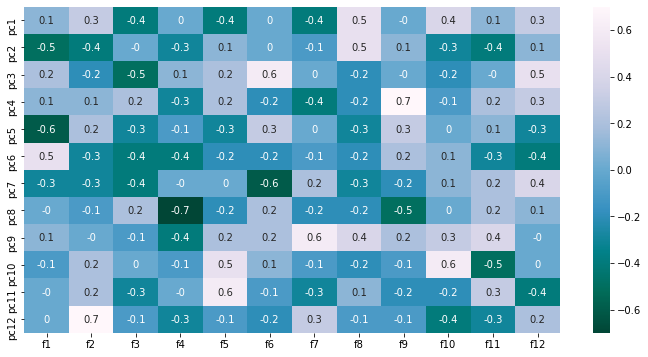

In [21]:
plt.figure(figsize=(12,6)) # visualize relationship of each new component vs. original features
sns.heatmap(df_comp,cmap='PuBuGn_r',annot=True)

Choosing k based on explained_variance_ratio_

In [22]:
pca.explained_variance_ratio_ 

array([0.36812308, 0.28414549, 0.14599145, 0.08918693, 0.04557636,
       0.0110907 , 0.01016586, 0.00982434, 0.00960466, 0.00944426,
       0.00874786, 0.00809901])

Text(0.5, 1.0, '% explain by k components')

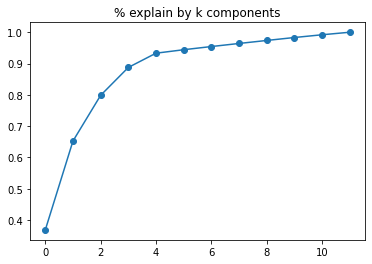

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.title("% explain by k components")

**Reduce to k dimension**

In [24]:
pca2= sklearn.decomposition.PCA(2)

In [25]:
pca2.fit(data.iloc[:,:-1])

PCA(n_components=2)

In [26]:
pca2_result= pca2.fit_transform(data.iloc[:,:-1])

In [27]:
principalDf = pd.DataFrame(data = pca2_result, columns = ['pc1','pc2'])

In [28]:
pca2.explained_variance_ratio_

array([0.36812308, 0.28414549])

In [29]:
principalDf['Class']=data.Class

<Figure size 576x576 with 0 Axes>

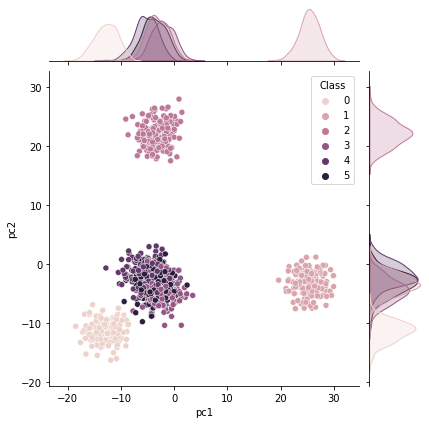

In [30]:
plt.figure(figsize = (8, 8))
sns.jointplot(data=principalDf,  x = 'pc1', 
              y = 'pc2', hue='Class')              
plt.show()